# <font color= #79955D> FINAL PROJECT </font>
* **Name:** Sarah Lucia Beltran Gutierrez
* **Date:** 29/04/2024 
* **Subject:** Programacion para analisis de datos
___

## <font color= #BACAAA> Defining the Problem </font>
### **Context:**
This dataset provides various information about patients, including age, gender, blood pressure, cholesterol levels, electrocardiographic (ECG) features, etc.
### **Objective:**
The problem to be addressed with this dataset will be to predict whether a person is less likely to have a heart attack, which will be 0, or if he/she is more likely to have a heart attack, which will be 1. Through data manipulation and exploration, the typw of data will tried to be found, if there are nulls, outliers, the cardinality of the data, skewness, etc. And with this, a suitable database is sought for the model to work optimally and correctly predict whether a person has a high or low chance of suffering a heart attack.
### **Justification:**
It's crucial to address heart attack prediction, as it can save lives by enabling early interventions and lifestyle changes to reduce risk. In addition, it helps minimize costs associated with treating heart attacks and improves medical care by personalizing care based on individual risk.

## <font color= #BACAAA> Data Collection </font>
This dataset was uploaded to kaggle, a website which can be used to find open/public datasets, by the author Ali Rezaei.
 *Heart.csv. (2023, 2 agosto). Kaggle. https://www.kaggle.com/datasets/arezaei81/heartcsv*
This is a public dataset which will be used as a cvs
### **Data Information:**
The variables to consider will be: 
* age 
* sex 
* cp 
* trestbps 
* chol 
* fbs 
* restecg 
* thalach 
* exang 
* oldpeak
* slope 
* ca
* thal 

The answer variable will be 
* target

### **Dataset Descriptions:**
 
* age : age of the patient

* sex : 

    0. 0 = Woman
    1. 1 = Men

* cp : chest Pain type chest pain type

    1. Value 1: typical angina
    2. Value 2: atypical angina
    3. Value 3: non-anginal pain
    4. Value 4: asymptomatic

* trestbps: resting blood pressure (in mm Hg)

* chol : serum cholestoral in mg/dl 

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* restecg : resting electrocardiographic results 
    0. Value 0: normal
    1. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >     0.05 mV)
    2. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* thalach : maximum heart rate achieved

* exang: exercise induced angina (1 = yes; 0 = no)

* oldpeak: ST depression induced by exercise relative to rest

* slope : the slope of the peak exercise ST segment

* ca: number of major vessels (0-3)

* thal: 
    0. Value 0: normal 
    1. Value 1: fixed defect
    2. Value 2: reversable defect

* target : 0= less likely of heart attack 1= more likely of heart attack

## <font color= #BACAAA> Data Cleaning & Analysis </font>

In [52]:
#main libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
#data prep libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#data modeling libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [53]:
#Import csv
df = pd.read_csv('../data/raw/heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [54]:
#Actual nuemric variables will be saved in 'num' variable so we can graph them correctly
num = df[['trestbps','chol','thalach','oldpeak']] #Whit this variables with can sum and get a correlation 
num.head()

,trestbps,chol,thalach,oldpeak
0,125,212,168,1.0
1,140,203,155,3.1
2,145,174,125,2.6
3,148,203,161,0.0
4,138,294,106,1.9


In [55]:
#Data dimension
df.shape

(1025, 14)

In [56]:
#Data type
d_type = pd.DataFrame(df.dtypes, columns=['data type'])
d_type

,data type
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [57]:
#Now, let's check if they're missing values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values, therefore we don't need to replace them, so we are going to the next step which is preparing the data for the analysis.


In [58]:
#Stats from our numeric data (previously saved at 'num' variable)
num.describe(include='all')

,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.00000,1025.000000,1025.000000
mean,131.611707,246.00000,149.114146,1.071512
std,17.516718,51.59251,23.005724,1.175053
min,94.000000,126.00000,71.000000,0.000000
25%,120.000000,211.00000,132.000000,0.000000
50%,130.000000,240.00000,152.000000,0.800000
75%,140.000000,275.00000,166.000000,1.800000
max,200.000000,564.00000,202.000000,6.200000


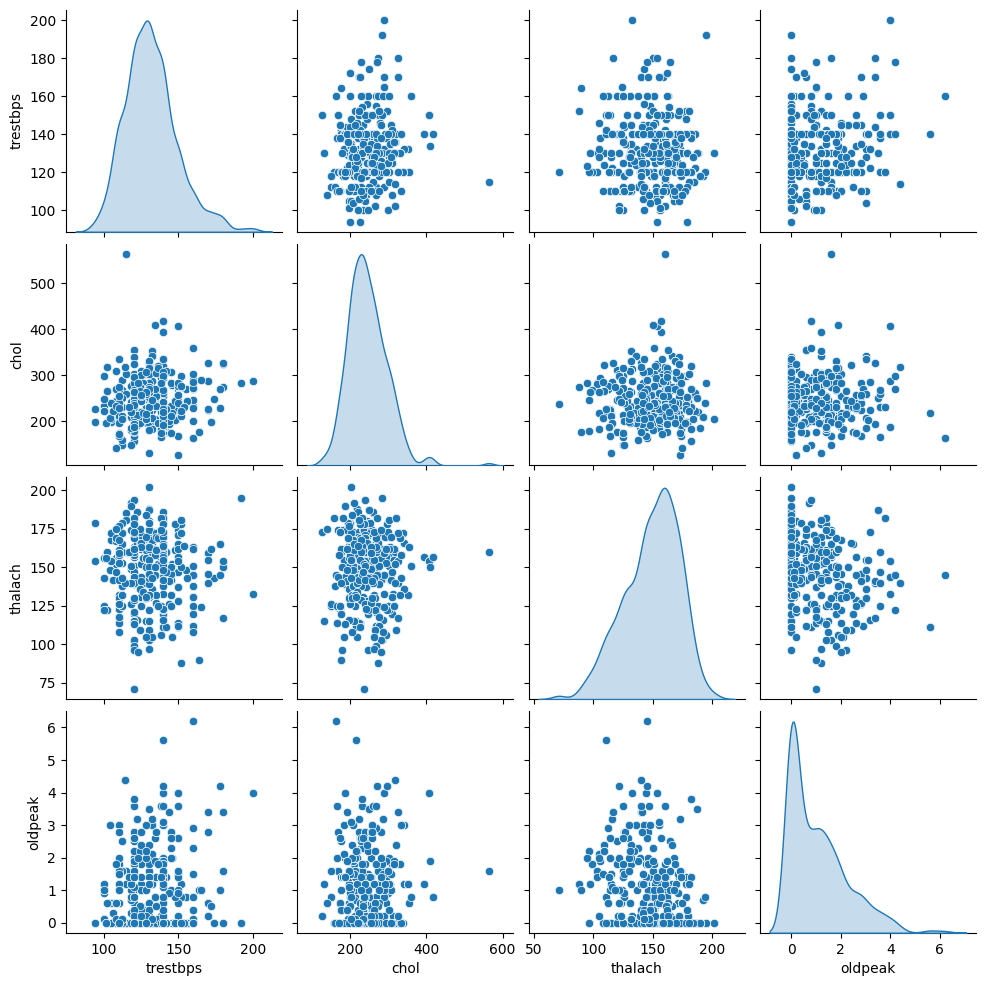

In [59]:
#Numeric variables graphs
sns.pairplot(num, diag_kind="kde")

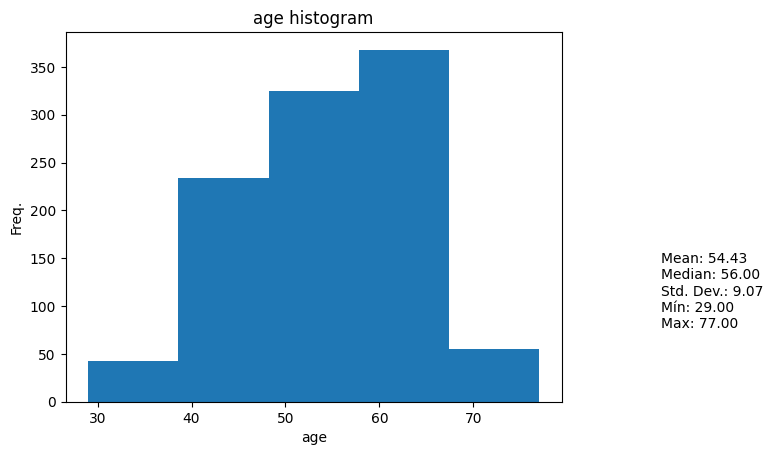

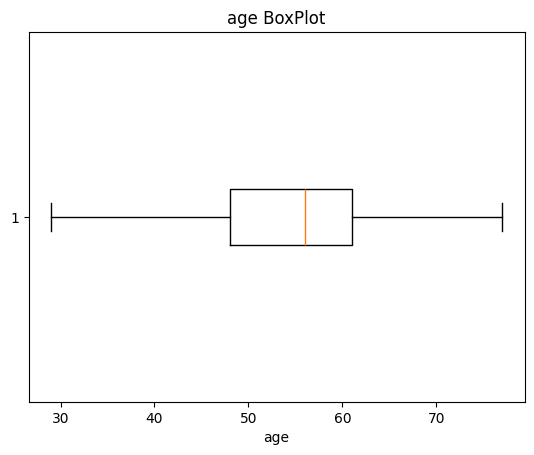

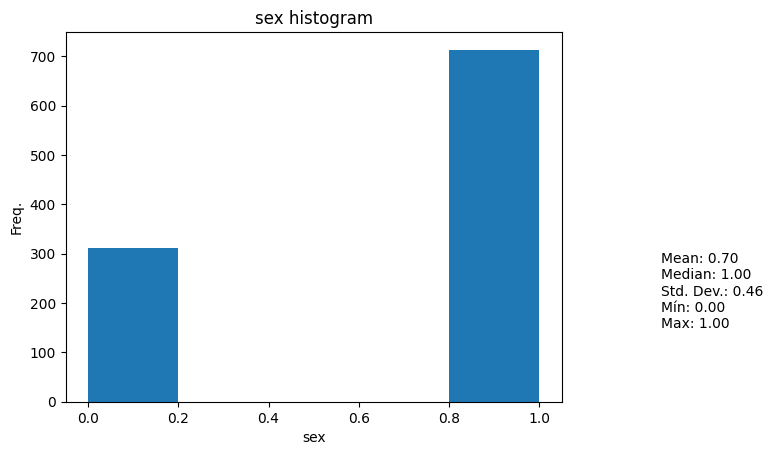

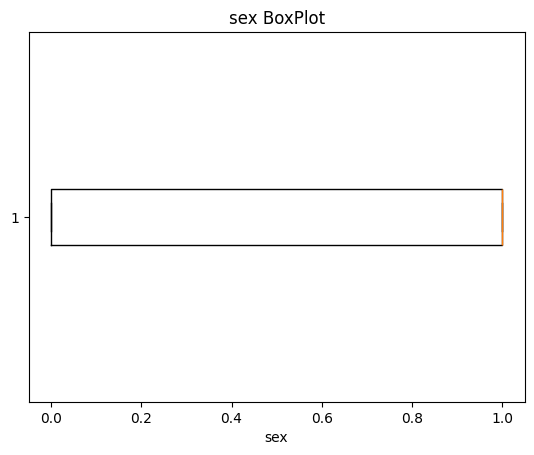

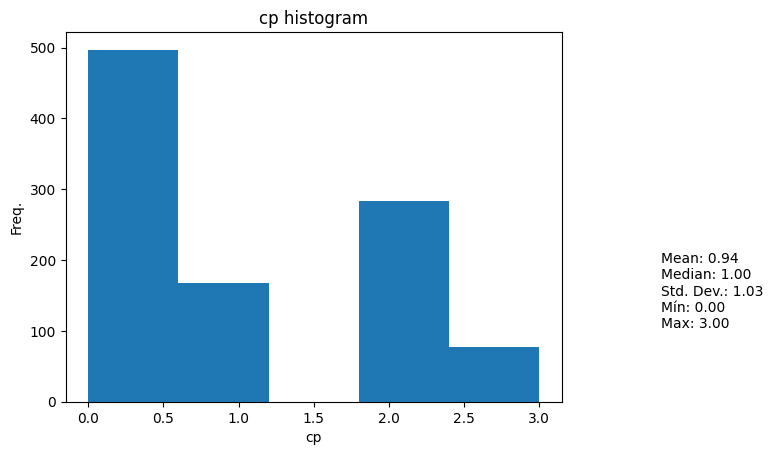

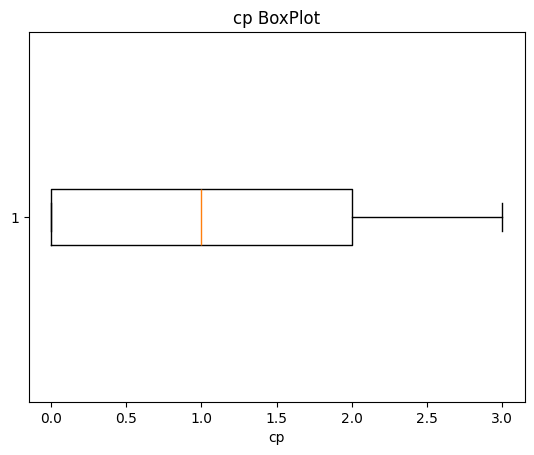

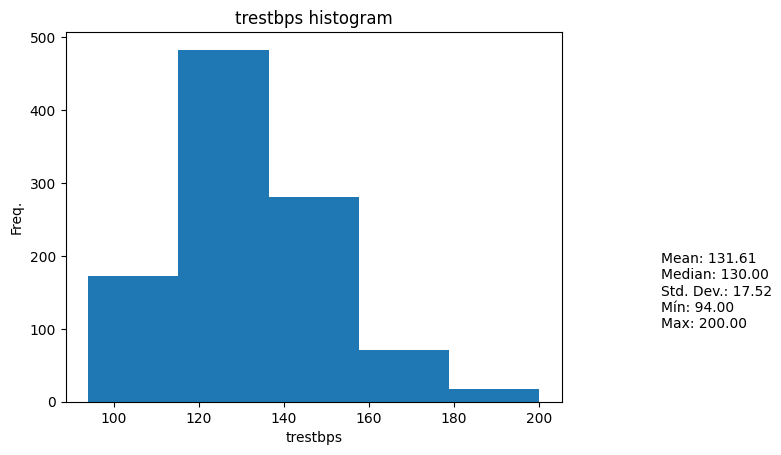

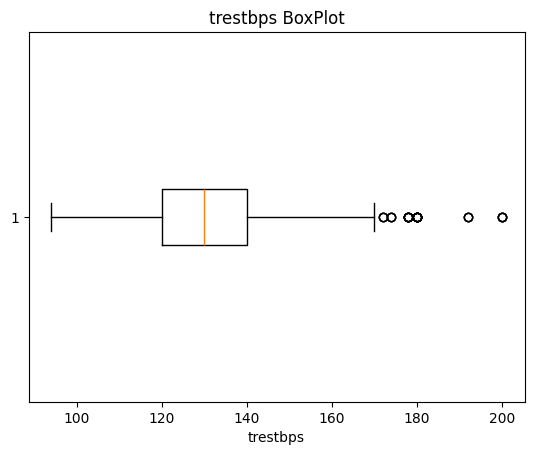

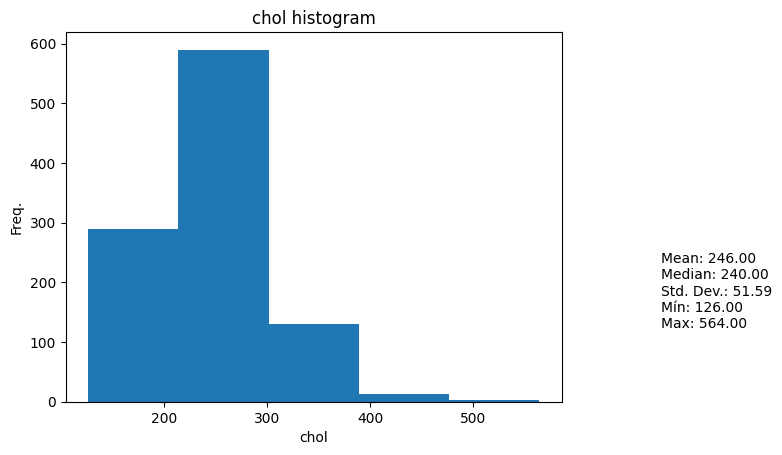

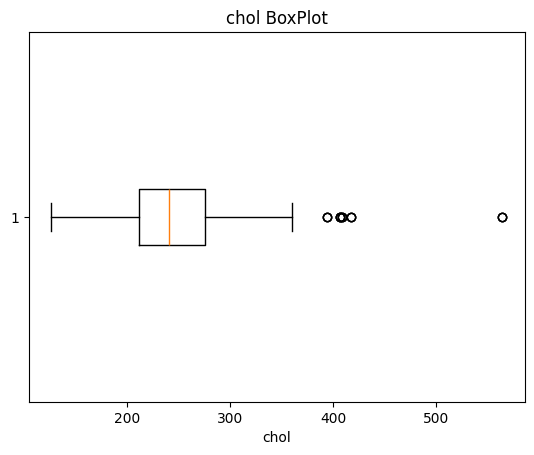

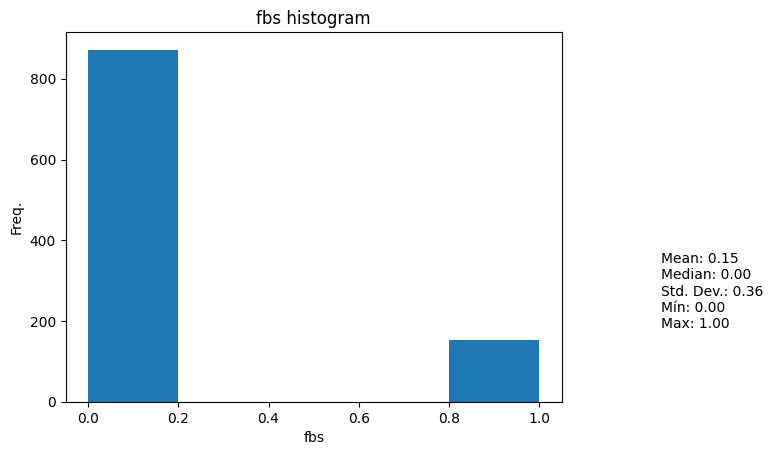

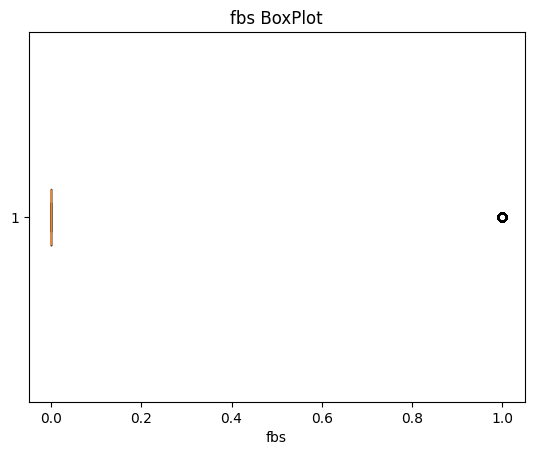

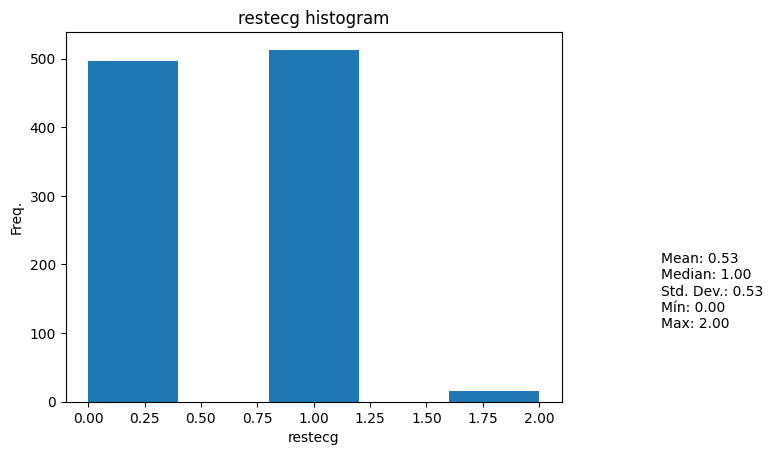

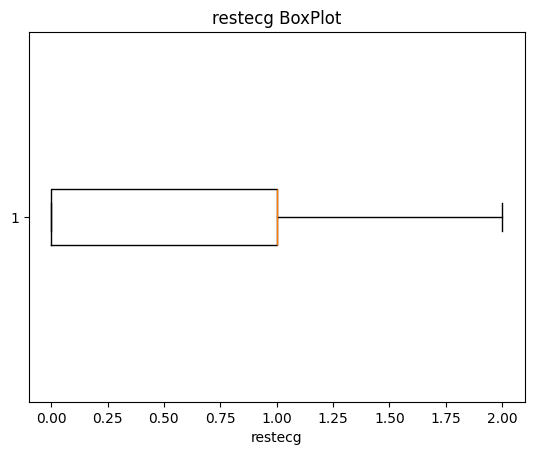

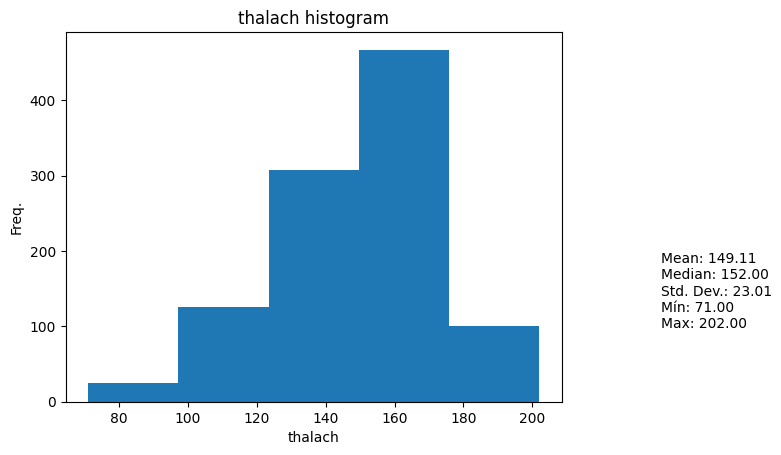

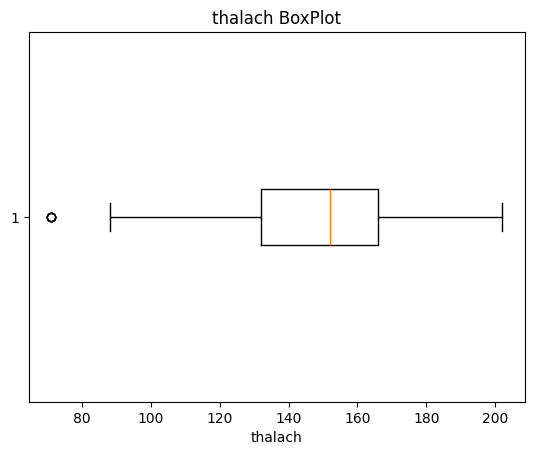

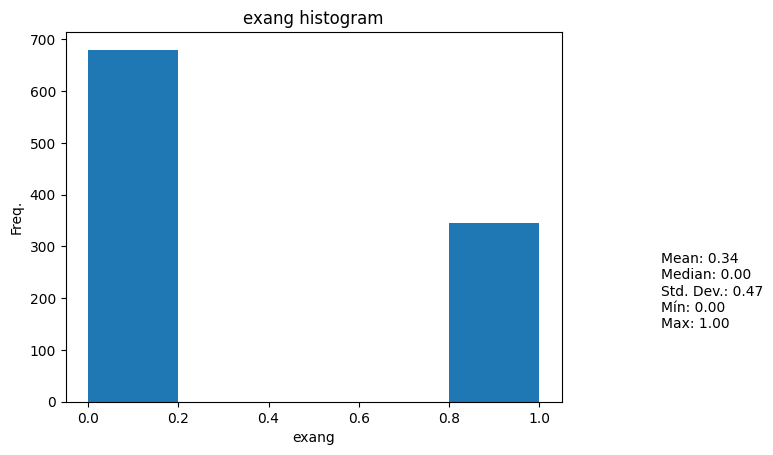

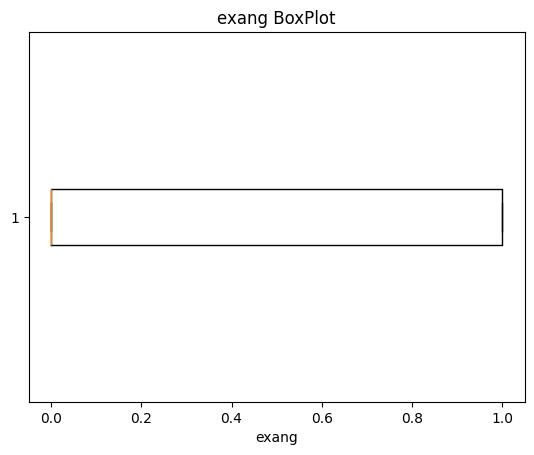

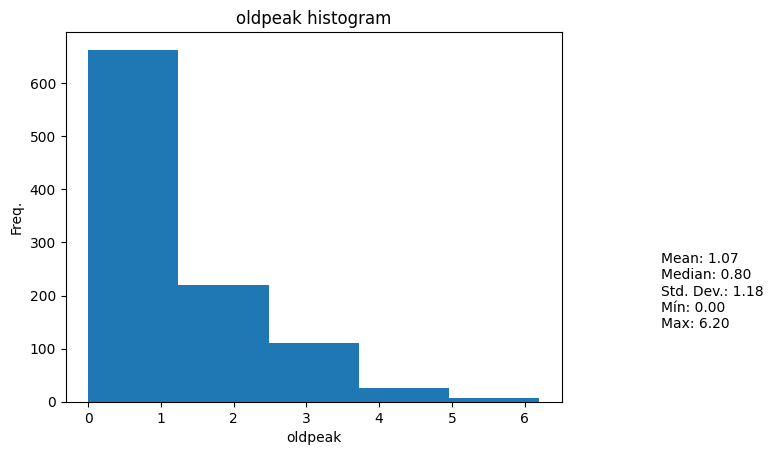

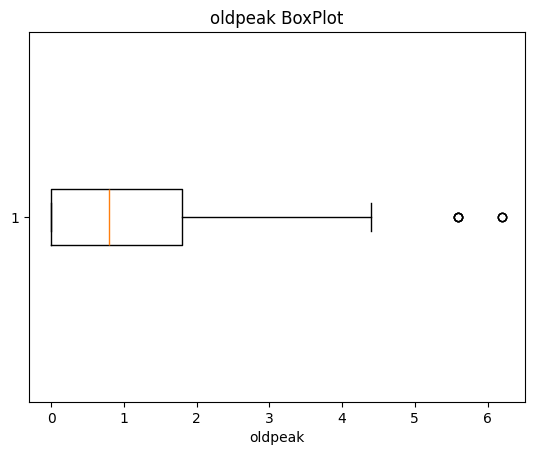

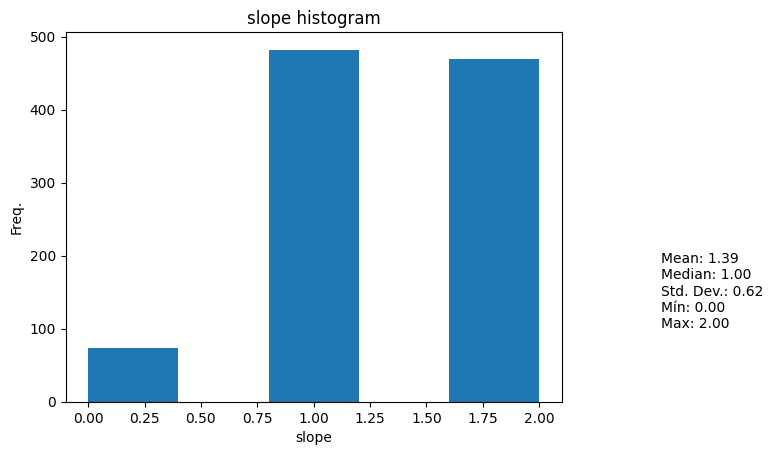

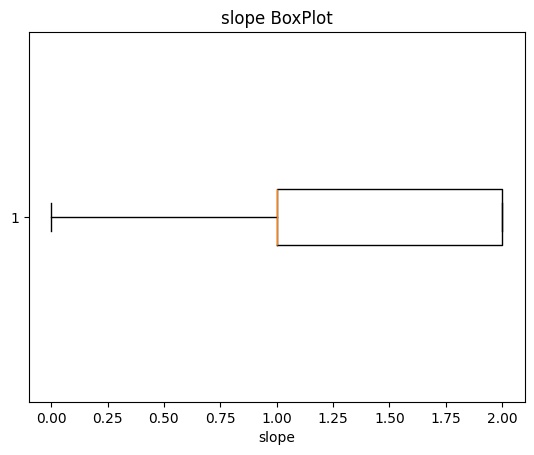

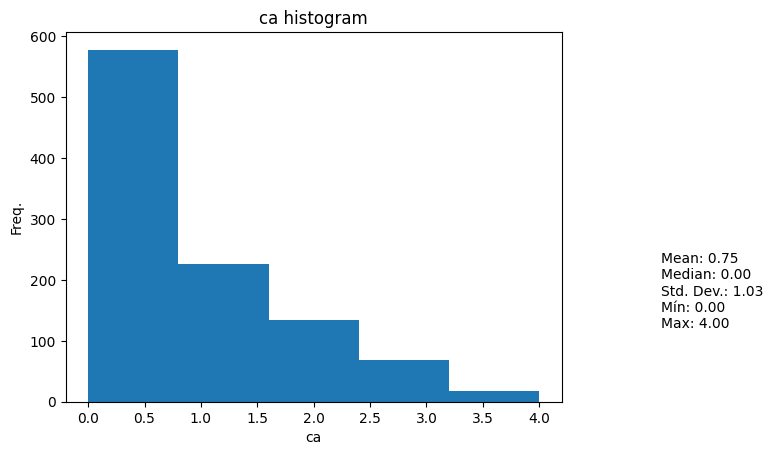

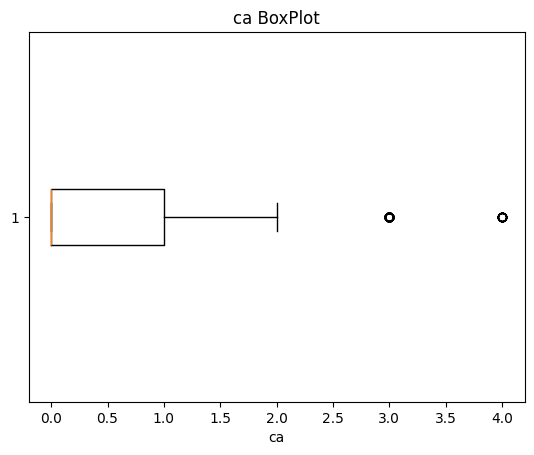

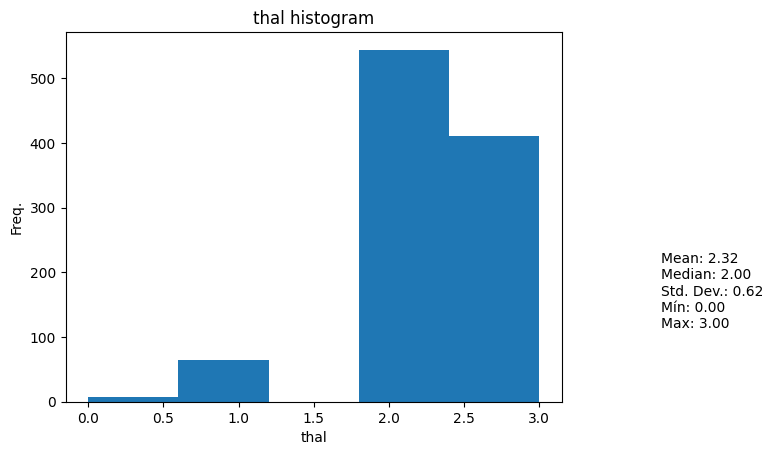

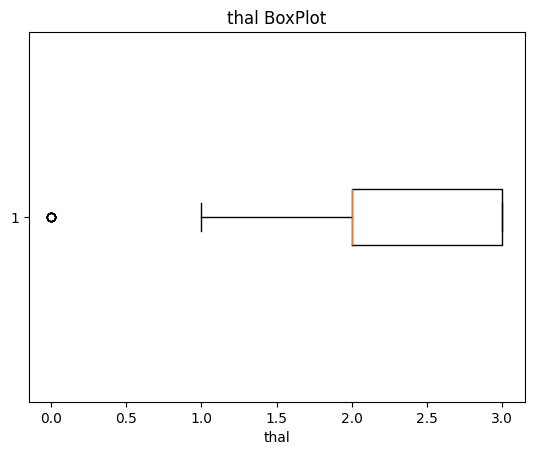

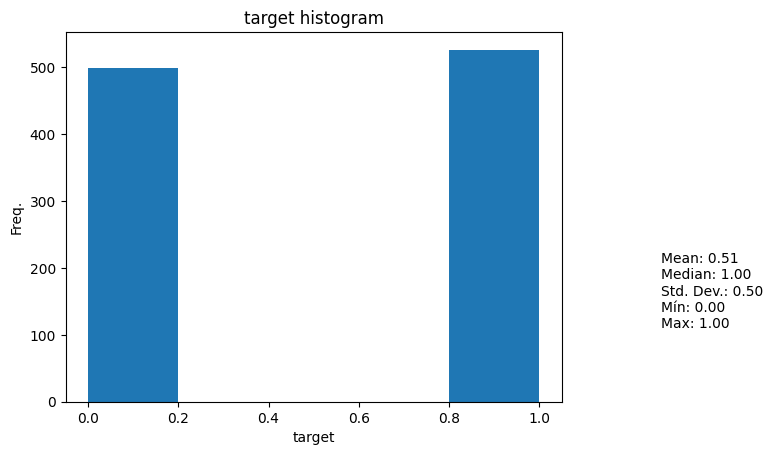

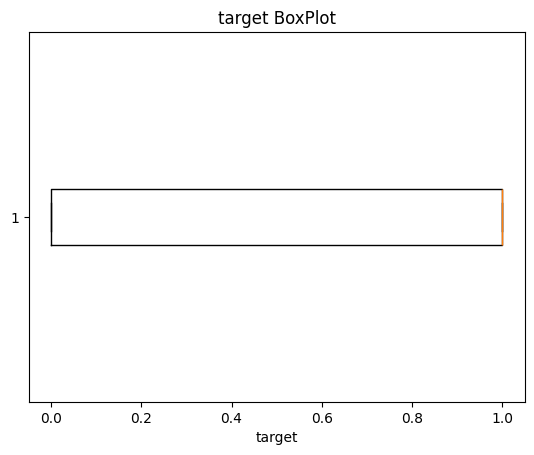

In [60]:
#Variables fraphs
for v in df:
    #Histograms
    plt.hist(df[v], bins=5)
    plt.title(f'{v} histogram')
    plt.xlabel(v)
    plt.ylabel('Freq.')
    #Stats measures
    v_mean = df[v].mean()
    v_median = df[v].median()
    v_std = df[v].std()
    v_min = df[v].min()
    v_max = df[v].max()
    #Add them to graphs
    plt.text(1.20, 0.20, f"Mean: {v_mean:.2f}\nMedian: {v_median:.2f}\nStd. Dev.: {v_std:.2f}\nMín: {v_min:.2f}\nMax: {v_max:.2f}",
             transform=plt.gca().transAxes)
    #Show graph
    plt.show()
    #Boxplot graph
    plt.boxplot(df[v], vert=False)
    plt.title(f'{v} BoxPlot')
    plt.xlabel(v)
    #Show grapj
    plt.show()

We can see there are outliers, an analysis will be made to see what would be the next step

In [61]:
#Outlier function
def find_boundaries(df_var,distance=1.5):
    IQR = df_var.quantile(0.75)-df_var.quantile(0.25)
    lower = df_var.quantile(0.25)-IQR*distance
    upper = df_var.quantile(0.75)+IQR*distance
    return lower,upper
#Trestbps outliers
lmin,lmax = find_boundaries(df['trestbps'])
outliers = np.where(df['trestbps'] > lmax, True,np.where(df['trestbps'] < lmin, True, False))
outliers_df = df.loc[outliers, 'trestbps']
outliers_df.head()

29     180
47     178
87     174
137    180
151    192
Name: trestbps, dtype: int64

In [62]:
#Chol outliers
lmin,lmax = find_boundaries(df['chol'])
outliers = np.where(df['chol'] > lmax, True,np.where(df['chol'] < lmin, True, False))
outliers_df = df.loc[outliers, 'chol']
outliers_df.head()

123    417
158    564
179    409
192    564
255    394
Name: chol, dtype: int64

In [63]:
#Fbs outliers
lmin,lmax = find_boundaries(df['fbs'])
outliers = np.where(df['fbs'] > lmax, True,np.where(df['fbs'] < lmin, True, False))
outliers_df = df.loc[outliers, 'fbs']
outliers_df.head()

1     1
4     1
11    1
14    1
19    1
Name: fbs, dtype: int64

In [64]:
#Thalach outliers
lmin,lmax = find_boundaries(df['thalach'])
outliers = np.where(df['thalach'] > lmax, True,np.where(df['thalach'] < lmin, True, False))
outliers_df = df.loc[outliers, 'thalach']
outliers_df.head()

267    71
296    71
378    71
559    71
Name: thalach, dtype: int64

In [65]:
#oldpeak outliers
lmin,lmax = find_boundaries(df['oldpeak'])
outliers = np.where(df['oldpeak'] > lmax, True,np.where(df['oldpeak'] < lmin, True, False))
outliers_df = df.loc[outliers, 'oldpeak']
outliers_df.head()

54     5.6
55     5.6
69     6.2
393    6.2
526    6.2
Name: oldpeak, dtype: float64

In [66]:
#ca outliers
lmin,lmax = find_boundaries(df['ca'])
outliers = np.where(df['ca'] > lmax, True,np.where(df['ca'] < lmin, True, False))
outliers_df = df.loc[outliers, 'ca']
outliers_df.head()

4     3
6     3
13    3
52    4
53    3
Name: ca, dtype: int64

In [67]:
#thalo utliers
lmin,lmax = find_boundaries(df['thal'])
outliers = np.where(df['thal'] > lmax, True,np.where(df['thal'] < lmin, True, False))
outliers_df = df.loc[outliers, 'thal']
outliers_df.head()

14     0
319    0
329    0
359    0
686    0
Name: thal, dtype: int64

### **Note:**
Almost all of the variables have outliers, eventhought they have around 4-5, which is a small amount, getting rid of the data will not be necessary or make a benefit, but if the model seems to be affected, we can modify/delete them later on.

In [68]:
#Relation between numeric and target variables, first well add 'target' to 'num'
num = df[['trestbps','chol','thalach','oldpeak', 'target']]

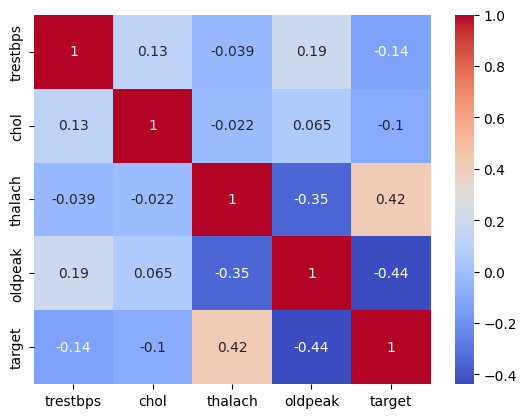

In [69]:
#Correlation with heatmao
corr_matrix = num.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The heatmaps shows that correlations are weak, inverse but small, so we dont **need to** get rid of anything

## <font color= #BACAAA> Data Prep. for Modeling </font>

In [70]:
#x & y
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']

#Train & test data, from sklearn train_test_split will be used
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

In [71]:
#data scaling from sklearn preprocessing will be used, this is to prevent big variables from having preference
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [72]:
#We will save the scaler method for later with "from sklearn.preprocessing import StandardScaler"
scaler = StandardScaler().fit(X_train)

In [73]:
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

## <font color= #BACAAA> Modeling: Logistic Regression </font>

### **What is Logistic Regression?**
Logistic regression is a method used to predict the probability that an outcome falls into one of two categories. In this case, it will predict whether or not a patient could have a heart attack based on variables such as age, sex, and symptoms. It uses a mathematical function called a logistic function to transform the independent variables into a probability between 0 and 1. With this, classification decisions can be made based on a predefined threshold.

In [74]:
#Folds used 
n_folds = 10 #for datasets that have around a 1000 variables, its recomended to use 5 or 10 folds.
seed = 9
scoring = 'accuracy' #It is calculated as the ratio of correct predictions to the total number of predictions made by the model.
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)
kfold

KFold(n_splits=10, random_state=9, shuffle=True)

In [75]:
# from sklearn.linear_model import LogisticRegression will be used
#object inicialization
logreg = LogisticRegression(max_iter=100)

#cross validation and train comparisson
accu_log = (cross_val_score(logreg, X_train, y_train, cv=kfold, scoring='accuracy')).mean()
prec_log = (cross_val_score(logreg, X_train, y_train, cv=kfold, scoring='precision')).mean()
reca_log = (cross_val_score(logreg, X_train, y_train, cv=kfold, scoring='recall')).mean()

# train performance 
print("accuracy train", accu_log)
print("precision Train", prec_log)
print("recall Train", reca_log)

accuracy train 0.8292682926829269
precision Train 0.8044482737840684
recall Train 0.8739969544949323


The model had a 83% of accuracy, which is good. Now the test.

In [103]:
#model training
logreg.fit(X_train, y_train)

LogisticRegression()

In [104]:
#prediction
y_pred_logreg = logreg.predict(X_test_scaled)

In [105]:
#model eval.
#Accuracy
accu_log = accuracy_score(y_test, y_pred_logreg)
#Precision
prec_log = precision_score(y_test, y_pred_logreg)
#Recall
reca_log = recall_score(y_test, y_pred_logreg)

print('Accuracy Precision Recall\n %0.3f\t  %0.3f\t   %0.3f'%(accu_log,prec_log,reca_log))

Accuracy Precision Recall
 0.888	  0.897	   0.904


Altought it got 90% of the values right (recall), it has a 88% of accuracy & 90% in precision, so next other 2 types of prediction models will be used, so we can finally compare and choose the best for this case.

## <font color= #BACAAA> Modeling: Random Forest </font>

### **What is Random Forest?**
Random forest combines the strength of multiple decision trees by training each on a random subset of data and features. By aggregating their predictions, it creates a robust and accurate model, widely valued for its versatility and ability to handle complex datasets.

In [81]:
# we are using from sklearn.ensemble import RandomForestClassifier
#Model Inicialization
model = RandomForestClassifier(min_samples_leaf=2,
                               criterion='gini', #The smaller the Gini index, the higher the purity of the node
                               bootstrap=True,
                               oob_score=False,
                               random_state=9)


In [82]:
# to determine the min_Samples_leaf we are using the grid method with from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 5),
                                'min_samples_split': range(2, 10, 2),
                                'n_estimators': [2, 5, 10]
                                }, 
                  cv=kfold,
                  verbose=0) #we use 0 so we dont get outputs during the model adjusting process

In [83]:
#data adjusting with fit
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=9, shuffle=True),
             estimator=RandomForestClassifier(min_samples_leaf=2,
                                              random_state=9),
             param_grid={'max_depth': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [2, 5, 10]})

In [84]:
#optimal hyperparameters
print(gs.best_params_)

{'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 10}


Now that we have the optimal hyperparameters, we'll train est our model with the correct hyperparameters

In [85]:
# with from sklearn.ensemble import RandomForestClassifier
new_model_RF = RandomForestClassifier(n_estimators=10,#número de árboles
                               criterion='gini',
                               max_depth=4,
                               min_samples_split=2,
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=9,
                               verbose=0)

In [86]:
#Adjust model
new_model_RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=10,
                       random_state=9)

In [87]:
#Cross validation & train test
accuracy_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='accuracy')).mean()
precision_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='precision')).mean()
recall_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='recall')).mean()

#Performance
print("accuracy train", accuracy_rf)
print("precision Train", precision_rf)
print("recall Train", recall_rf)

accuracy train 0.874390243902439
precision Train 0.8565750992713006
recall Train 0.8993528812095546


Now, let's test our model

In [88]:
#Model testing
yhat = new_model_RF.predict(X_test)
accu_rf  = accuracy_score(y_test,yhat)
prec_rf = precision_score(y_test,yhat)
reca_rf = recall_score(y_test,yhat)
print('Accuracy Precision Recall\n %0.3f\t  %0.3f\t   %0.3f'%(accu_rf,prec_rf,reca_rf))

Accuracy Precision Recall
 0.888	  0.883	   0.922


We can see a lot of improvement with this method with an 92% of recall, and 88% of accuracy and 88% of precision, this makes it a great model for this data, but just in case we'll test another method so we have 3 point of comparisson.

For the last method we will use Decision Trees, we could also have used XGBoost, but to be honest i tried to make my predictions with it and couldn't do it. XGBoost its a model similar to Decision Trees, as i have a more simple dataset, and XGBoost its rather used at complex ones, i'll stick with its easier version.

## <font color= #BACAAA> Modeling: Decision Trees </font>

### **What is Decision Trees?**
Decision trees are models that divide data into smaller subsets based on specific characteristics, maximizing homogeneity in terms of target class (classification) or target value (regression). This iterative process creates an "if... then...", allowing you to predict the class or target value of new data based on its location in the tree.

In [89]:
# we are using from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [90]:
#Grid search for hyperparameters
gs = GridSearchCV(dt,
                  param_grid = {'max_depth': range(1, 5),
                                'min_samples_split': range(2, 10, 1)},
                  cv=kfold)

In [91]:
#model training
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=9, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 5),
                         'min_samples_split': range(2, 10)})

In [92]:
#optimal hyperparameters
print(gs.best_params_)

{'max_depth': 4, 'min_samples_split': 3}


In [93]:
#Now that we have the hyperparameters we will train it
dt_new = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
dt_new.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
accuracy_tree= (cross_val_score(dt_new, X_train,y_train, cv=kfold,  scoring='accuracy')).mean()
precision_tree= (cross_val_score(dt_new, X_train,y_train, cv=kfold,  scoring='precision')).mean()
recall_tree= (cross_val_score(dt_new, X_train,y_train, cv=kfold,  scoring='recall')).mean()

print('Accuracy\t Precision\t Recall\n %0.3f\t %0.3f\t %0.3f'%(accuracy_tree,precision_tree,recall_tree))

Accuracy	 Precision	 Recall
 0.829	 0.839	 0.828


It did pretty well at the training, but now lets see it at the testing

In [94]:
#test performance
y_pred_dt = dt_new.predict(X_test)

In [95]:
#Accuracy
accu_dt = accuracy_score(y_test, y_pred_dt)
#Precision
prec_dt = precision_score(y_test, y_pred_dt)
#Recall
reca_dt = recall_score(y_test, y_pred_dt)

print('Accuracy Precision Recall\n %0.3f\t  %0.3f\t   %0.3f'%(accu_dt,prec_dt,reca_dt))

Accuracy Precision Recall
 0.844	  0.849	   0.878


Gladly they went up, meaning it was a great train.

Now we will compare the three of our models, so we can see which one did the best.

## <font color= #BACAAA> Models Comparison </font>

In [102]:
data_comp = {'Model': ['LR','RF', 'DTree'], 'Accuracy': [accu_log , accu_rf ,accu_dt], 'Precision': [prec_log,prec_rf,prec_dt], 'Recall': [reca_log,reca_rf ,reca_dt]} 
data_comp = pd.DataFrame(data_comp)
data_comp

,Model,Accuracy,Precision,Recall
0,LR,0.887805,0.896552,0.904348
1,RF,0.887805,0.883333,0.921739
2,DTree,0.843902,0.848739,0.878261


So the best model is Random Forest with a bigger values at arecall category. Finally, we are going to apply it to our data to prove if it is actually as good as it sems to be.

## <font color= #BACAAA> Data Prediction </font>

In [97]:
#scaled data pred.
X_scaled = scaler.fit_transform(X)
ynew = new_model_RF.predict(X_scaled)

In [98]:
df['new_target']=ynew

In [99]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new_target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,1


In [100]:
dif = (df['target'] != df['new_target']).sum()
print(f'different values in target and new_target columns: {dif}')

different values in target and new_target columns: 106


Finally, we can appreciate that from 1024 rows, only 106 values were wrongly predicted.

In [101]:
perc = dif * 100 / 1024
print(f'the percentage of wrong predicted values is: {perc}%')

the percentage of wrong predicted values is: 10.3515625%


This means there was only 10% of error in our predictions.

## <font color= #BACAAA> Conclusion </font>

In conclusion, this project effectively utilized machine learning algorithms to predict heart attacks likelihood based on patients data. Among the models explored, Random Forest was the most accurate and precise, showcasing its potential for improving healthcare outcomes. Moving forward, further optimization and evaluation on external datasets could enhance the model's predictive power and generalizability.

###### github repo link: https://github.com/sarahbltn/data_analytics_project/tree/main